# Goal - This Data Challenge is Work in Progress
You belong to the people analytics team for a food conglomerate. Employee turnover has been rampant for your 10 subsidiaries. The CFO estimates that the cost of replacing an employee is often larger than 100K USD, taking into account the time spent to interview and find a replacement, placement fees, sign-on bonuses and the loss of productivity for several months.
Your team has been tasked with diagnosing why and when employees from your subsidiaries leave. You need a tangible data-driven recommendation for each of the ten Presidents of your subsidiaries. What are your recommendations and why?

# Challenge Description
We got employee data from a few companies. We have data about all employees who joined from 2011/01/24 to 2015/12/13. For each employee, we also know if they are still at the company as of 2015/12/13 or they have quit. Beside that, we have general info about the employee, such as average salary during her tenure, department, and years of experience. As said above, the goal is to predict employee retention and understand its main drivers

In [146]:
import pandas as pd
import numpy as np

In [147]:
data = pd.read_csv('C:/Users/Ali/Documents/Insight/Data Challenge/Week7 Revolvong Door/employee_retention.txt', sep=",",
                  dtype={'employee_id': int,'company_id':int,'dept':str, 'seniority':int, 'salary': float})
#data.columns = ['employee_id','company_id','dept','seniority','salary','join_date','quit_date']

In [148]:
data['join_date'] = pd.to_datetime(data['join_date'])
data['quit_date'] = pd.to_datetime(data['quit_date'])
data.set_index('employee_id', inplace = True)
data = data[['company_id','dept','seniority','salary','join_date','quit_date']]
data.head()

,company_id,dept,seniority,salary,join_date,quit_date
employee_id,,,,,,
1001444,8,temp_contractor,0,5850.0,2008-01-26,2008-04-25
388804,8,design,21,191000.0,2011-05-17,2012-03-16
407990,3,design,9,90000.0,2012-03-26,2015-04-10
120657,2,engineer,20,298000.0,2013-04-08,2015-01-30
1006393,1,temp_contractor,0,8509.0,2008-07-20,2008-10-18


As mentioned in the explanation above, there are supposed to be 10 subsidiary companies where as there are 12. 2 of them have limited number of observations which hints a data input error.

In [149]:
data['company_id'].unique()
data.groupby('company_id').size()

company_id
1     9501
2     5220
3     3773
4     3066
5     2749
6     2258
7     2185
8     2026
9     2005
10    1879
11      16
12      24
dtype: int64

In [150]:
data = data[data['company_id'] < 11]

Check also if there is an illogical observation such as
* a row with a quit date before the join 
* quit date later than 2015/12/13
* unreasonable seniority i.e. years of experience as of the day the employee has joined the company

In [151]:
data[data['quit_date'] < data['join_date'] ]

,company_id,dept,seniority,salary,join_date,quit_date
employee_id,,,,,,


In [152]:
data.sort_values(by = 'quit_date', ascending=False).head()

,company_id,dept,seniority,salary,join_date,quit_date
employee_id,,,,,,
346498,4,customer_service,7,70000.0,2014-02-24,2015-12-09
117918,1,engineer,6,204000.0,2014-11-10,2015-12-08
755075,3,engineer,15,232000.0,2014-12-29,2015-12-08
687860,2,data_science,21,298000.0,2012-08-29,2015-12-04
101824,2,engineer,12,192000.0,2013-01-22,2015-12-04


In [153]:
data.sort_values(by = 'seniority', ascending=False).head()

,company_id,dept,seniority,salary,join_date,quit_date
employee_id,,,,,,
604052,1,marketing,99,185000.0,2011-07-26,2013-12-06
97289,10,engineer,98,266000.0,2011-12-13,2015-01-09
684438,2,customer_service,29,127000.0,2015-04-08,NaT
423729,1,customer_service,29,94000.0,2015-02-23,NaT
530540,1,customer_service,29,131000.0,2012-09-04,2013-10-04


In [154]:
data = data[data['seniority'] < 40]

Calculate number of years worked at the company as of quit date OR of 2015/12/13 should the employee is still at the company

In [155]:
data['quit_date2'] = data['quit_date']
data.head()

,company_id,dept,seniority,salary,join_date,quit_date,quit_date2
employee_id,,,,,,,
1001444,8,temp_contractor,0,5850.0,2008-01-26,2008-04-25,2008-04-25
388804,8,design,21,191000.0,2011-05-17,2012-03-16,2012-03-16
407990,3,design,9,90000.0,2012-03-26,2015-04-10,2015-04-10
120657,2,engineer,20,298000.0,2013-04-08,2015-01-30,2015-01-30
1006393,1,temp_contractor,0,8509.0,2008-07-20,2008-10-18,2008-10-18


In [156]:
data.loc[data['quit_date'].isna()]
data.loc[data['quit_date'].isna()].head()

,company_id,dept,seniority,salary,join_date,quit_date,quit_date2
employee_id,,,,,,,
287530,5,marketing,20,180000.0,2014-06-30,NaT,NaT
545690,10,data_science,16,238000.0,2013-12-23,NaT,NaT
622587,5,sales,28,166000.0,2015-07-01,NaT,NaT
430126,2,data_science,3,77000.0,2015-08-03,NaT,NaT
34604,2,design,29,224000.0,2015-09-08,NaT,NaT


In [157]:
data.loc[data['quit_date'].isna(), 'quit_date2'] = pd.to_datetime('2015-12-13')

In [158]:
data.loc[data['quit_date'].isna()].head()

,company_id,dept,seniority,salary,join_date,quit_date,quit_date2
employee_id,,,,,,,
287530,5,marketing,20,180000.0,2014-06-30,NaT,2015-12-13
545690,10,data_science,16,238000.0,2013-12-23,NaT,2015-12-13
622587,5,sales,28,166000.0,2015-07-01,NaT,2015-12-13
430126,2,data_science,3,77000.0,2015-08-03,NaT,2015-12-13
34604,2,design,29,224000.0,2015-09-08,NaT,2015-12-13


In [159]:
data['duration_worked'] = data['quit_date2'] - data['join_date']

In [160]:
data[data['quit_date'].isna()].sort_values(by = 'duration_worked').head()

,company_id,dept,seniority,salary,join_date,quit_date,quit_date2,duration_worked
employee_id,,,,,,,,
957941,1,engineer,12,204000.0,2015-12-10,NaT,2015-12-13,3 days
928116,10,marketing,18,157000.0,2015-12-10,NaT,2015-12-13,3 days
821435,2,data_science,22,332000.0,2015-12-09,NaT,2015-12-13,4 days
815645,3,data_science,3,57000.0,2015-12-09,NaT,2015-12-13,4 days
890357,2,customer_service,1,33000.0,2015-12-09,NaT,2015-12-13,4 days


In [161]:
data.sort_values(by='duration_worked', ascending=False).head()

,company_id,dept,seniority,salary,join_date,quit_date,quit_date2,duration_worked
employee_id,,,,,,,,
873665,1,sales,20,214000.0,2011-01-31,NaT,2015-12-13,1777 days
582568,1,marketing,7,134000.0,2011-01-31,NaT,2015-12-13,1777 days
710287,5,sales,12,101000.0,2011-01-31,NaT,2015-12-13,1777 days
592117,5,customer_service,12,63000.0,2011-02-07,NaT,2015-12-13,1770 days
478641,7,customer_service,18,103000.0,2011-02-07,NaT,2015-12-13,1770 days


In [162]:
data.loc[data['quit_date'].isna(), 'quit_bin'] = 1
data.loc[data['quit_bin'].isna(), 'quit_bin'] = 0
data.head()

,company_id,dept,seniority,salary,join_date,quit_date,quit_date2,duration_worked,quit_bin
employee_id,,,,,,,,,
1001444,8,temp_contractor,0,5850.0,2008-01-26,2008-04-25,2008-04-25,90 days,0.0
388804,8,design,21,191000.0,2011-05-17,2012-03-16,2012-03-16,304 days,0.0
407990,3,design,9,90000.0,2012-03-26,2015-04-10,2015-04-10,1110 days,0.0
120657,2,engineer,20,298000.0,2013-04-08,2015-01-30,2015-01-30,662 days,0.0
1006393,1,temp_contractor,0,8509.0,2008-07-20,2008-10-18,2008-10-18,90 days,0.0


In [163]:
data.describe()

,company_id,seniority,salary,duration_worked,quit_bin
count,34660.000000,34660.000000,34422.000000,34660,34660.000000
mean,4.014541,10.048759,100285.654552,434 days 13:22:15.718407,0.322447
std,2.901286,9.332517,87345.000912,375 days 19:10:23.877953,0.467420
min,1.000000,0.000000,5000.000000,3 days 00:00:00,0.000000
25%,1.000000,0.000000,9299.000000,90 days 00:00:00,0.000000
50%,3.000000,8.000000,88000.000000,347 days 00:00:00,0.000000
75%,6.000000,18.000000,158000.000000,676 days 00:00:00,1.000000
max,10.000000,29.000000,408000.000000,1777 days 00:00:00,1.000000


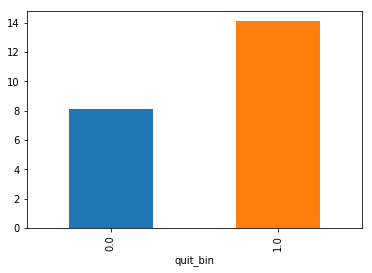

In [181]:
data.groupby("quit_bin")['seniority'].mean().plot(kind='bar')


#data.plot(x='quit_bin', y='seniority', kind='bar')

In [ ]:
#data.groupby("quit_bin")['duration_worked'].mean().plot(kind='bar')

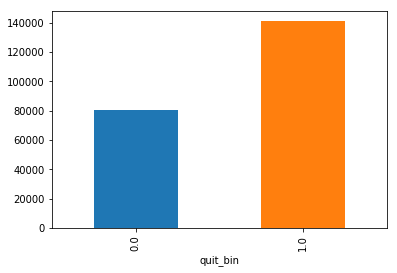

In [182]:
data.groupby("quit_bin")['salary'].mean().plot(kind='bar')

In [186]:
df_company_dummies = pd.get_dummies(data['company_id'])
data = pd.merge(data, df_company_dummies, left_index=True, right_index=True)
data.head()

In [219]:
data_input = data[['seniority','salary','duration_worked','quit_bin',1,2,3,4,5,6,7,8,9,10]]

In [220]:
data_input.head()
data_input.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34660 entries, 1001444 to 963023
Data columns (total 14 columns):
seniority          34660 non-null int32
salary             34422 non-null float64
duration_worked    34660 non-null timedelta64[ns]
quit_bin           34660 non-null float64
1                  34660 non-null uint8
2                  34660 non-null uint8
3                  34660 non-null uint8
4                  34660 non-null uint8
5                  34660 non-null uint8
6                  34660 non-null uint8
7                  34660 non-null uint8
8                  34660 non-null uint8
9                  34660 non-null uint8
10                 34660 non-null uint8
dtypes: float64(2), int32(1), timedelta64[ns](1), uint8(10)
memory usage: 2.8 MB


In [221]:
from datetime import datetime, timedelta
data_input['duration_worked'] = data_input['duration_worked'] / timedelta (days=1)

C:\Users\Ali\Anaconda3_Insight\envs\insight\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [222]:
data_input.head()

,seniority,salary,duration_worked,quit_bin,1,2,3,4,5,6,7,8,9,10
employee_id,,,,,,,,,,,,,,
1001444,0,5850.0,90.0,0.0,0,0,0,0,0,0,0,1,0,0
388804,21,191000.0,304.0,0.0,0,0,0,0,0,0,0,1,0,0
407990,9,90000.0,1110.0,0.0,0,0,1,0,0,0,0,0,0,0
120657,20,298000.0,662.0,0.0,0,1,0,0,0,0,0,0,0,0
1006393,0,8509.0,90.0,0.0,1,0,0,0,0,0,0,0,0,0


In [254]:
data_input.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34422 entries, 1001444 to 963023
Data columns (total 14 columns):
seniority          34422 non-null int32
salary             34422 non-null float64
duration_worked    34422 non-null float64
quit_bin           34422 non-null float64
1                  34422 non-null uint8
2                  34422 non-null uint8
3                  34422 non-null uint8
4                  34422 non-null uint8
5                  34422 non-null uint8
6                  34422 non-null uint8
7                  34422 non-null uint8
8                  34422 non-null uint8
9                  34422 non-null uint8
10                 34422 non-null uint8
dtypes: float64(3), int32(1), uint8(10)
memory usage: 1.5 MB


In [262]:
data_input =  data_input.dropna()
data_input['duration_worked'].unique()

array([  90.,  304., 1110., ...,  472.,  252., 1697.])

In [289]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
#uffa = data_input.reset_index()
X = data_input[['seniority','salary','duration_worked',1,2,3,4,5,6,7,8,9,10]].reset_index()
Y = data_input['quit_bin'].reset_index()
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 0) 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(25816, 14) (8606, 14) (25816, 2) (8606, 2)


In [290]:
np.any(np.isnan(X_train))

False

In [291]:
np.all(np.isfinite(X_train))

True

In [292]:
data_input.head()

,seniority,salary,duration_worked,quit_bin,1,2,3,4,5,6,7,8,9,10
employee_id,,,,,,,,,,,,,,
1001444,0,5850.0,90.0,0.0,0,0,0,0,0,0,0,1,0,0
388804,21,191000.0,304.0,0.0,0,0,0,0,0,0,0,1,0,0
407990,9,90000.0,1110.0,0.0,0,0,1,0,0,0,0,0,0,0
120657,20,298000.0,662.0,0.0,0,1,0,0,0,0,0,0,0,0
1006393,0,8509.0,90.0,0.0,1,0,0,0,0,0,0,0,0,0


In [293]:
#X_train.loc[X_train[''].isna()]
data_input.loc[data_input[2].isna()]

,seniority,salary,duration_worked,quit_bin,1,2,3,4,5,6,7,8,9,10
employee_id,,,,,,,,,,,,,,


In [294]:
np.any(np.isnan(X_train))

False

In [295]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
train_data = scaler.fit_transform(X_train)
test_data = scaler.transform(X_test)

C:\Users\Ali\Anaconda3_Insight\envs\insight\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [299]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier 
#Rsq N=5: 0.21 N=15: 0.26
knn = KNeighborsClassifier(n_neighbors=55)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred) 

#Import scikit-learn metrics module for accuracy calculation
#from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

0.2658466985886096